# Installing Tensorflow-GPU

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 37kB/s 
     |████████████████████████████████| 501kB 53.0MB/s 
     |████████████████████████████████| 4.3MB 38.6MB/s 


# Importing neccessory Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

# Loading the dataset

In [0]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
X_train.max()

255

# Rescaling for faster training

In [0]:
X_test = X_test/255.0
X_train = X_train/255.0

# Reshaping the data as 2D-CNN expects 3D Input

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
X_test[1].shape

(28, 28, 1)

In [0]:
inputShape = X_train[2].shape

# Building the Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=inputShape ))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

## Compiling the model

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Training the Model

In [20]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.2429 - accuracy: 0.9267 - val_loss: 0.0543 - val_accuracy: 0.9833
Epoch 2/10
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0847 - accuracy: 0.9759 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 3/10
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 4/10
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0309 - val_accuracy: 0.9895
Epoch 5/10
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0269 - val_accuracy: 0.9915
Epoch 6/10
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0317 - val_accuracy: 0.9910
Epoch 7/10
60000/60000 [==========================

# Plotting the curve for accuracy and loss

In [0]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

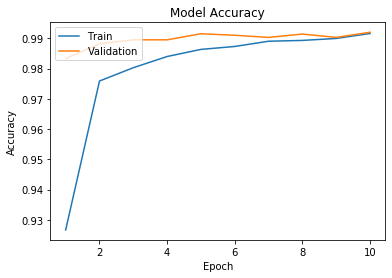

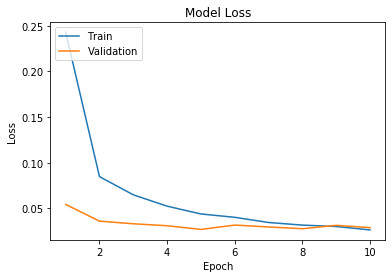

In [24]:
plotLearningCurve(history,10)